## Random Walks and the Central Limit Theorem

Kyle P. Rasku RN BSN; 
August 2021

In [1]:
import numpy
import pandas
import random

In [2]:
def random_walk(n, choices=[(0, 1), (0, -1), (1, 0), (-1, 0)]):
    x, y = 0, 0
    for i in range(n):
        (dx, dy) = random.choice(choices)
        x += dx
        y += dy
    return x, y


### The most basic Discrete Stochastic Process: a fair Random Walk

We can take some arbitrarily large number of "walks" (equivalent to drawing a large # of samples) of n "steps" (size n) where:

1. n is a discrete, randomly-chosen coordinate adjustment from the default 'choices' list, defined above in the random walk function
2. each possible n has a 25% chance of being chosen
3. we assume that each "step" takes place at a discrete time-point, equivalent to the # of the steps, 0 - n

### This process creates a sampling distribution of sample means

1. The samples are the walks having n steps
2. The samples means are the mean distances traveled from the origin during each walk of n steps
3. The number of times we sample is the total number of walks (generally, a very large number)

### The sampling distribution of the sample mean follows the Central Limit Theorem (CLT)

The population does not need to be normally distributed, but as long as the sample size (n) > 30, the sampling distribution of the sample means will approximate a normal distribution.

In [3]:
# Try walking 100 fair steps, 10,000 times
num_walks = 10000
steps_per_walk = 100

print(num_walks, "simulations of", steps_per_walk, "steps will be run.")

10000 simulations of 100 steps will be run.


In [4]:

distances = []
x_coords, y_coords = [], []
for i in range(num_walks):
    end_coords = random_walk(steps_per_walk)
    walk_length = abs(end_coords[0]) + abs(end_coords[1])
    distances.append(walk_length)
    x_coords.append(end_coords[0])
    y_coords.append(end_coords[1])

# print("Lengths of all walks tried: ")
# distances

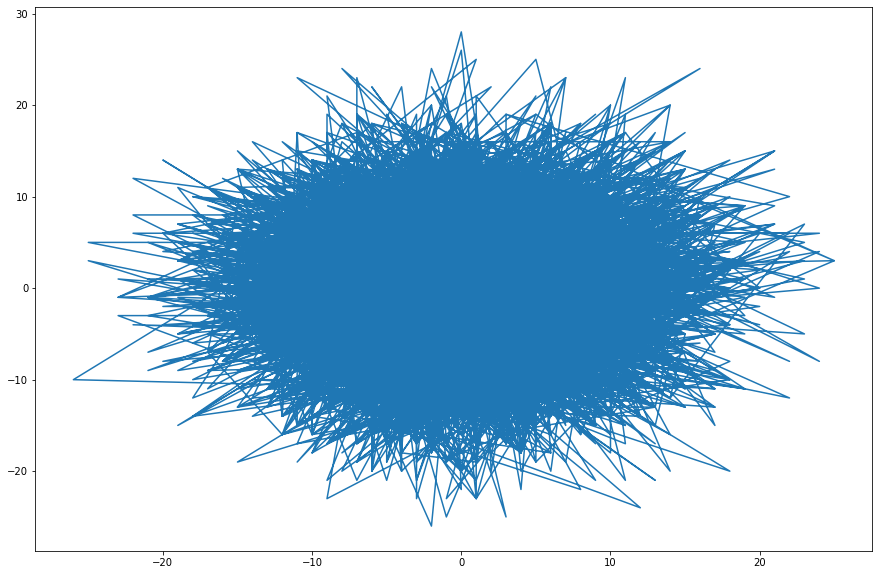

In [5]:
import matplotlib.pyplot as plt

# Plot the raw coordinates of the walks

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plt.plot(x_coords, y_coords)

<function matplotlib.pyplot.show(close=None, block=None)>

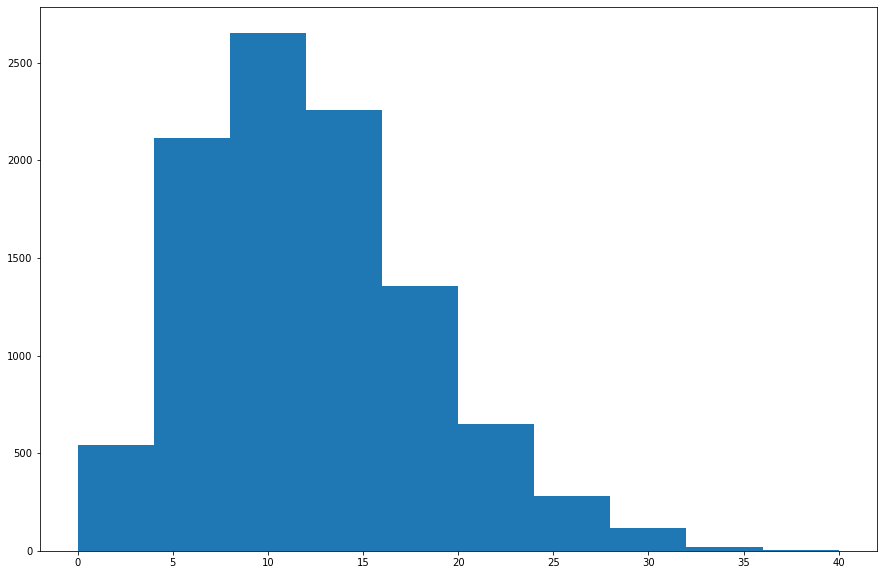

In [6]:

# plot a histogram of the distances (absolute length traveled from the starting point)

f2 = plt.figure()
f2.set_figwidth(15)
f2.set_figheight(10)
plt.hist(distances)
plt.show

In [7]:
# describe the x and y coordinates

xs = pandas.Series(x_coords)
x_stats = xs.describe()
x_stats

count    10000.000000
mean         0.032700
std          7.037086
min        -26.000000
25%         -5.000000
50%          0.000000
75%          5.000000
max         25.000000
dtype: float64

In [8]:
ys = pandas.Series(y_coords)
y_stats = ys.describe()
y_stats

count    10000.000000
mean        -0.066900
std          7.094706
min        -26.000000
25%         -5.000000
50%          0.000000
75%          5.000000
max         28.000000
dtype: float64

In [9]:
s = pandas.Series(distances)
stats = s.describe()
stats

count    10000.000000
mean        11.256600
std          5.985995
min          0.000000
25%          6.000000
50%         10.000000
75%         14.000000
max         40.000000
dtype: float64

In [10]:
print("The mean distance walked is", stats[1])

The mean distance walked is 11.2566


In [11]:
print("The mean distance walked is", stats[1]/steps_per_walk * 100, "% of all steps walked.")

The mean distance walked is 11.2566 % of all steps walked.


In [12]:
print("The square root of the total number of steps walked is", numpy.sqrt(steps_per_walk))

The square root of the total number of steps walked is 10.0


In [13]:
print("Mean - Square Root(total steps walked):", stats[1]-numpy.sqrt(steps_per_walk))

Mean - Square Root(total steps walked): 1.2566000000000006


In [14]:
print("The variance is", stats[2]**2)

The variance is 35.83213965396517


In [15]:
print("The mean is", stats[1]/(stats[2]**2) * 100, "% of the variance.")

The mean is 31.414813931588228 % of the variance.


In [16]:
print("The mean + std dev:", stats[1]+stats[2])

The mean + std dev: 17.24259529351345


In [17]:
print("The mean - std dev:", stats[1]-stats[2])

The mean - std dev: 5.270604706486551


In [18]:
print("The difference between the mean and median is", stats[1]-stats[5])

The difference between the mean and median is 1.2566000000000006


In [19]:
print("The std dev / sq root of n: ", stats[2]/numpy.sqrt(steps_per_walk))

The std dev / sq root of n:  0.598599529351345


### An Unfair Random Walk

In [20]:
# An unfair walk, where one or more directions are favored or penalized.
num_walks = 10000
steps_per_walk = 30

print(num_walks, "simulations of", steps_per_walk, "steps will be run.")

10000 simulations of 30 steps will be run.


In [21]:

distances = []
x_coords, y_coords = [], []
for i in range(num_walks):
    # weighting the walk-choices, so walking N (increasing Y) will be favored, and walking S (decreasing Y) will be penalized
    # try plugging in a variety of "unfair" weights and see how the statistical summaries change
    end_coords = random_walk(steps_per_walk, [(0, 1.5), (0, -0.5), (1, 0), (-1, 0)])
    walk_length = abs(end_coords[0]) + abs(end_coords[1])
    distances.append(walk_length)
    x_coords.append(end_coords[0])
    y_coords.append(end_coords[1])

# print("Lengths of all walks tried: ")
# distances

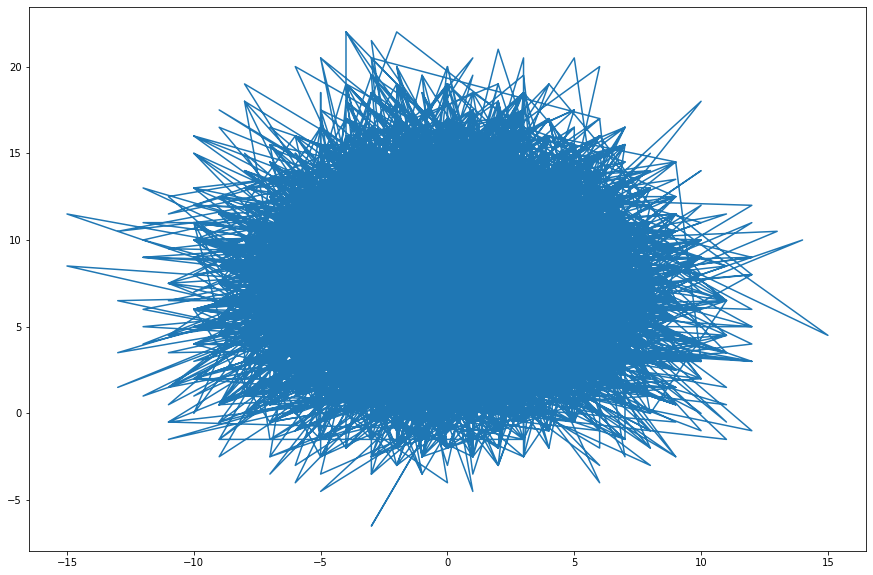

In [22]:
import matplotlib.pyplot as plt

# Plot the raw coordinates of the walks

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plt.plot(x_coords, y_coords)

<function matplotlib.pyplot.show(close=None, block=None)>

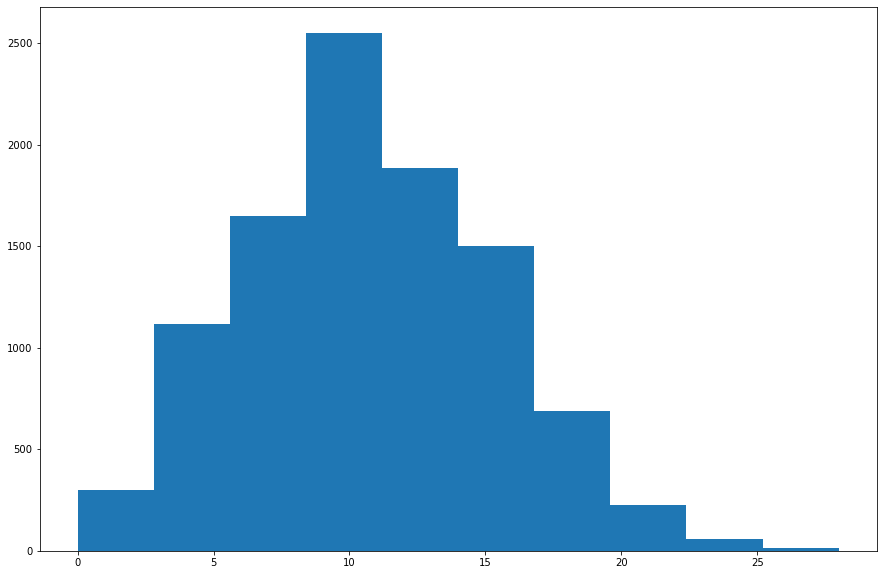

In [23]:

# plot a histogram of the distances (absolute length traveled from the starting point)

f2 = plt.figure()
f2.set_figwidth(15)
f2.set_figheight(10)
plt.hist(distances)
plt.show

In [24]:
# describe the x and y coordinates

xs = pandas.Series(x_coords)
x_stats = xs.describe()
x_stats

count    10000.000000
mean         0.014100
std          3.903745
min        -15.000000
25%         -3.000000
50%          0.000000
75%          3.000000
max         15.000000
dtype: float64

In [25]:
ys = pandas.Series(y_coords)
y_stats = ys.describe()
y_stats

count    10000.000000
mean         7.548650
std          4.088622
min         -6.500000
25%          4.500000
50%          7.500000
75%         10.500000
max         22.000000
dtype: float64

In [26]:
s = pandas.Series(distances)
stats = s.describe()
stats

count    10000.000000
mean        10.707650
std          4.533008
min          0.000000
25%          7.500000
50%         10.500000
75%         13.500000
max         28.000000
dtype: float64

In [27]:
print("The mean distance walked is", stats[1])

The mean distance walked is 10.70765


In [28]:
print("The mean distance walked is", stats[1]/steps_per_walk * 100, "% of all steps walked.")

The mean distance walked is 35.692166666666665 % of all steps walked.


In [29]:
print("The square root of the total number of steps walked is", numpy.sqrt(steps_per_walk))

The square root of the total number of steps walked is 5.477225575051661


In [30]:
print("Mean - Square Root(total steps walked):", stats[1]-numpy.sqrt(steps_per_walk))

Mean - Square Root(total steps walked): 5.230424424948338


In [31]:
print("The variance is", stats[2]**2)

The variance is 20.54816129362931


In [32]:
print("The mean is", stats[1]/(stats[2]**2) * 100, "% of the variance.")

The mean is 52.110015329302314 % of the variance.


In [33]:
print("The mean + std dev:", stats[1]+stats[2])

The mean + std dev: 15.240657974141376


In [34]:
print("The mean - std dev:", stats[1]-stats[2])

The mean - std dev: 6.174642025858622


In [35]:
print("The difference between the mean and median is", stats[1]-stats[5])

The difference between the mean and median is 0.20764999999999922


In [36]:
print("The std dev / sq root of n: ", stats[2]/numpy.sqrt(steps_per_walk))

The std dev / sq root of n:  0.8276102402626756


The same number of walks with the same number of steps - but when N is favored over S by .1, the variance increases by 7.2.

When N is favored over S by .5, the variance then increases by 38 - it doubles. And when N is favored over S by 1.5, variance increases by 71.

Note the change in the y-axis range in the plot of the fair walk vs. the unfair walk.  The range of the fair walk is about equal in every direction, while the range of the unfair walk is much more positively-skewed along the y-axis.

## Adding Wormholes

Not only do small changes in bias impact the measures and skew of many real world probabilities and outcomes, but randomness plays an additional part in modifying trajectories that might otherwise seem more predictable.

In the fair random walk, the mean and variance were pretty constant.  While we couldn't predict exactly where any individual walk would travel, overall we could calculate the predicted range of many walks with some accuracy.  We can see the Central Limit Theorem at work here.  It doesn't matter if the walk is fair or biased - if we sample enough walks, they will be normally distributed, and this quality is robust, even when we add randomness, or cut down on the sample size of the walk / number of steps.

S0 what happens when we add "wormholes" to a fair random walk?  Will the CLT hold?  For how long?  

Lets make a list of coordinates that, when travelled to, teleport the walker to another random location on the walk.  We can begin with one, then add another, and then another and see how these random acts change our analysis of a random walk. We can make the impact more marked by adding some distance to the newly generated mapping points as well.

In [37]:

def random_walk_with_wormholes(n, choices=[(0, 1), (0, -1), (1, 0), (-1, 0)]):
    
    # create wormholes that will teleport you somewhere else
    #
    # these wormholes must be within mean distance of the starting point
    # or they are very unlikely to be hit any time during the walk
    # when the walk is 30, the mean walk is 6.3
    # when the walk is 100, the mean walk is about 11...
    # pretty safe to use the square root of n as the range of wormholes :)
    w = int(n/5)
    r = int(numpy.sqrt(n))+1
    wormholes = []
    for j in range(w):
        w_x = random.randint(-r, r)
        w_y = random.randint(-r, r)
        wormholes.append((w_x, w_y))
    
    #print("The wormholes are", wormholes, "for a grid", n/2, "by", n/2, "where sqrt(n) is", r)
    
    x, y = 0, 0
    for i in range(n):
        # take a step
        (dx, dy) = random.choice(choices)
        x += dx
        y += dy
        #print("The new coordinates are", x, ",", y)
        # check to see if a wormhole was hit
        if (x, y) in wormholes:
            #print("You hit a wormhole!")
            # teleport somewhere else by
            # generating two random numbers between 0 and n
            x = random.randint(-n/2,n/2)
            y = random.randint(-n/2,n/2)
            #print("You have been teleported to", x, ",", y)
            
    return x, y


In [38]:
num_walks = 1000
steps_per_walk = 30

print(num_walks, "simulations of", steps_per_walk, "steps will be run.")

1000 simulations of 30 steps will be run.


In [39]:
distances = []
x_coords, y_coords = [], []
for i in range(num_walks):
    end_coords = random_walk_with_wormholes(steps_per_walk)
    walk_length = abs(end_coords[0]) + abs(end_coords[1])
    distances.append(walk_length)
    x_coords.append(end_coords[0])
    y_coords.append(end_coords[1])


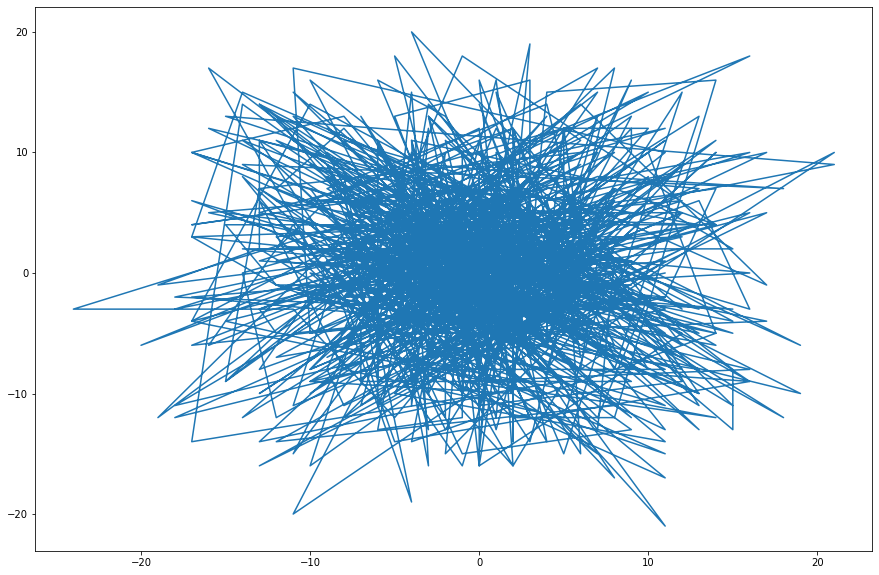

In [40]:
f = plt.figure()
f.set_figwidth(15)
f.set_figheight(10)
plt.plot(x_coords, y_coords)

<function matplotlib.pyplot.show(close=None, block=None)>

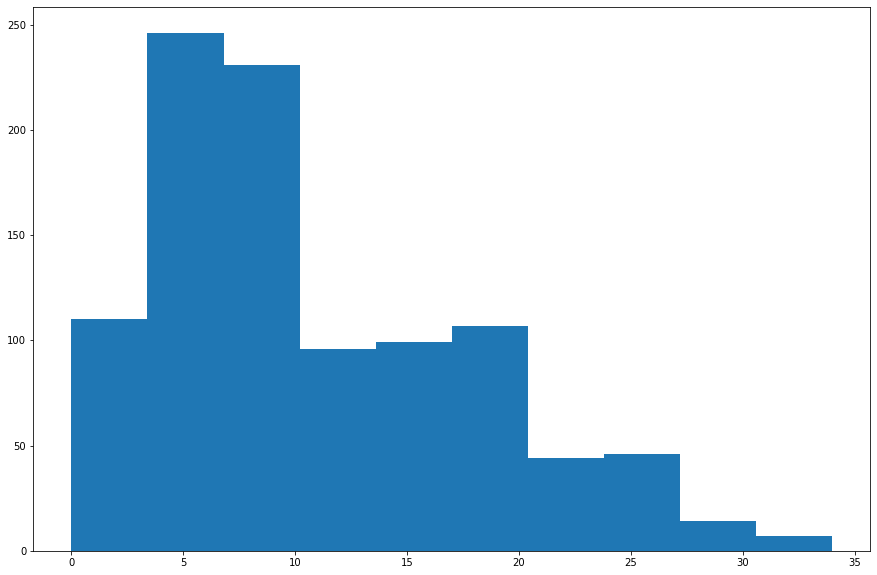

In [41]:
f2 = plt.figure()
f2.set_figwidth(15)
f2.set_figheight(10)
plt.hist(distances)
plt.show

The more wormholes you add to the list, the more chaotic the walk graph becomes.

The process still tends towards the normal distribution, but now you have introduced a process that prevents complete normalization.

### Characterizing the Process that Leads to Chaos / Denormalization

1. There must be a **sufficient #** of wormholes.
2. The wormholes **must be within the range sqrt(n)**, as an approximation of mean distance traveled - otherwise they are very unlikely to be hit, and the walk will function like the fair random walk.
3. The "teleportation" mechanism must possibly move the walker **more than mean distance away** from their current coordinates

If we meet these criteria, the wormhole experiment will produce an outcome that will successfully DENORMALIZE the distribution of the distances.

In [42]:
# describe the x and y coordinates

xs = pandas.Series(x_coords)
x_stats = xs.describe()
x_stats

count    1000.000000
mean       -0.072000
std         7.121203
min       -24.000000
25%        -4.000000
50%         0.000000
75%         4.000000
max        21.000000
dtype: float64

In [43]:
ys = pandas.Series(y_coords)
y_stats = ys.describe()
y_stats

count    1000.000000
mean        0.072000
std         6.890595
min       -21.000000
25%        -4.000000
50%         0.000000
75%         4.000000
max        20.000000
dtype: float64

In [44]:
s = pandas.Series(distances)
stats = s.describe()
stats

count    1000.0000
mean       10.7740
std         7.0537
min         0.0000
25%         6.0000
50%         9.0000
75%        15.0000
max        34.0000
dtype: float64

In [45]:
print("The mean distance walked is", stats[1])

The mean distance walked is 10.774


In [46]:
print("The mean distance walked is", stats[1]/steps_per_walk * 100, "% of all steps walked.")

The mean distance walked is 35.91333333333333 % of all steps walked.


In [47]:
print("The square root of the total number of steps walked is", numpy.sqrt(steps_per_walk))

The square root of the total number of steps walked is 5.477225575051661


In [48]:
print("Mean - Square Root(total steps walked):", stats[1]-numpy.sqrt(steps_per_walk))

Mean - Square Root(total steps walked): 5.296774424948338


In [49]:
print("The variance is", stats[2]**2)

The variance is 49.75467867867881


In [50]:
print("The mean is", stats[1]/(stats[2]**2) * 100, "% of the variance.")

The mean is 21.654244959714596 % of the variance.


In [51]:
print("The mean + std dev:", stats[1]+stats[2])

The mean + std dev: 17.82769964477357


In [52]:
print("The mean - std dev:", stats[1]-stats[2])

The mean - std dev: 3.7203003552264278


In [53]:
print("The difference between the mean and median is", stats[1]-stats[5])

The difference between the mean and median is 1.7739999999999991


In [54]:
print("The std dev / sq root of n: ", stats[2]/numpy.sqrt(steps_per_walk))

The std dev / sq root of n:  1.287823469769554
